Spacy
https://spacy.io/usage/rule-based-matching#entityruler
https://github.com/explosion/spaCy/issues/3608
https://spacy.io/usage/processing-pipelines
https://spacy.io/usage/training

In [1]:
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd
from nltk.tokenize import sent_tokenize
import numpy as np
import re
#nlp =spacy.load('es_core_news_md')

In [2]:
import unidecode

In [3]:
def trans(text):
    #from nltk.corpus import stopwords
    #from nltk.stem import SnowballStemmer
    #stop_words = stopwords.words('spanish')
    #stop_words.extend(['do','re','mi','fa','si'])
    #stop_words.remove('y')
    #stop_words.remove('de')
    #stop_words.remove('la')
    temp=text.split(' ')
    for k,i in enumerate(temp):
        i=re.sub(r'[“”´]*','',i)
        #i=unidecode.unidecode(i)
        #print(i)
        if i.isupper():
            if i=='DE' or i=='LA'or i=='DEL' or i=='EL':
                
                i=i.lower()
            firstl=i[0]
            otros=''
            for j in range(1,len(i)):
                otros=otros+i[j].lower()
            palabra=firstl+otros
            #if palabra.lower() in stop_words:
            #    palabra=''
            temp[k]=palabra
        else:
            #if i.lower() in stop_words:
            #   i=''
            temp[k]=i
    prueba=' '.join(temp)
    return prueba 
    #print(prueba)        

In [4]:
df=pd.read_excel('Relatos_viajes-Benvenutto.xlsx')
a=''
for i in range(18,20):
    a=a+df.loc[i,'Texto']
df.head()

,Capitulo,Texto
0,La Placita de la Recoleta \n,"SALIENDO DE LA CALLE DE BELÉN, la mejor y más ..."
1,La Plazuela de la Salud \n,LA PLACITA RECOLETANA se une a la plazuela de ...
2,La Plazuela de San Carlos\n,"SALIENDO DEL ANTIGUO TEATRO “POLITEAMA”, propi..."
3,La Plazuela de Santa Catalina\n,"EN ESTA CIUDAD DE PLAZAS Y PLAZUELAS, la de Sa..."
4,La Plazuela de San Pedro \n,\nCURIOSA CALLE es en verdad la que antiguamen...


In [5]:
df

,Capitulo,Texto
0,La Placita de la Recoleta \n,"SALIENDO DE LA CALLE DE BELÉN, la mejor y más ..."
1,La Plazuela de la Salud \n,LA PLACITA RECOLETANA se une a la plazuela de ...
2,La Plazuela de San Carlos\n,"SALIENDO DEL ANTIGUO TEATRO “POLITEAMA”, propi..."
3,La Plazuela de Santa Catalina\n,"EN ESTA CIUDAD DE PLAZAS Y PLAZUELAS, la de Sa..."
4,La Plazuela de San Pedro \n,\nCURIOSA CALLE es en verdad la que antiguamen...
5,La Plazuela de los Desamparados\n,LA PLAZUELA DE LOS DESAMPARADOS no es una verd...
6,La Bajada del Puente y la Plazuela de San Láza...,"LO PRIMERO QUE SE HALLA, bajando el puente a l..."
7,La Plazuela de Monserrate\n,"DESEOSOS DE “GOZAR” DEL MES DE MARIA, que dura..."
8,La Plazuela de las Nazarenas\n,CADA UNA DE LAS PLAZUELAS LIMEÑAS está caracte...
9,La Plazuela de Santa Ana \n,ASI COMO PARA IR A MONSERRATE tomamos hace día...


In [20]:
lista1=a.split('.')

In [21]:
lista1

['DOBLAMOS LA ESQUINA de la Pescadería, resistiendo a la tentación de hacer pascana, aunque breve deliciosa, en el salón de Solari, para saborear su celebérrimo ante con ante',
 ' No llegamos a saber de qué manera éste endiablado genovés ha conseguido robarnos la criollísima receta y prepararlo tan bueno como lo pudiera hacer la más mazamorrera limeña de huasaquiú',
 ' Pensando en el difícil problema y eludiendo el convite que tales reflexiones insinúan, seguimos de frente rumbo a la franciscana plazoleta',
 '\nDe nuestra nueva serie de Plazuelas, próxima a publicarse en libro, entregamos a la Prensa ésta de San Francisco, con el doble propósito de que sea un adelanto de la obra y una levantada protesta contra los estropeos que, inconcebiblemente, permite la Municipalidad en tan castizo rincón limeño, que es de lo poco bueno que nos va dejando la novelería de modernizar y ahuachafarlo todo',
 ' ¿Cómo es posible que ya lleguen a tres los quiosquitos de infame traza que se alzan insolent

In [6]:
#lista1=a.split('\n')
lista2=[]
a=re.sub('etc.','etc',a)
a=a.replace('…','...')
lista1=sent_tokenize(a)
for j,i in enumerate(lista1):
    if i!='':
        i=trans(i)
        i=i.strip()
        i=re.sub('[.:?¿¡!“]|[0-9]+','',i)
        #i=" ".join(i.split())
        lista2.append(i)

In [23]:

lista2

['Doblamos la Esquina de la Pescadería, resistiendo a la tentación de hacer pascana, aunque breve deliciosa, en el salón de Solari, para saborear su celebérrimo ante con ante',
 'No llegamos a saber de qué manera éste endiablado genovés ha conseguido robarnos la criollísima receta y prepararlo tan bueno como lo pudiera hacer la más mazamorrera limeña de huasaquiú',
 'Pensando en el difícil problema y eludiendo el convite que tales reflexiones insinúan, seguimos de frente rumbo a la franciscana plazoleta',
 'De nuestra nueva serie de Plazuelas, próxima a publicarse en libro, entregamos a la Prensa ésta de San Francisco, con el doble propósito de que sea un adelanto de la obra y una levantada protesta contra los estropeos que, inconcebiblemente, permite la Municipalidad en tan castizo rincón limeño, que es de lo poco bueno que nos va dejando la novelería de modernizar y ahuachafarlo todo',
 'Cómo es posible que ya lleguen a tres los quiosquitos de infame traza que se alzan insolentes, af

In [25]:
len(lista1)

315

In [8]:
# Entidades reconocidas

listemp=[]
listemp1=[]
listemp2=[]
listemp3=[]
listemp4=[]
for l,i in enumerate(lista2):
    
    #print([(X, X.ent_iob_, X.ent_type_) for X in doc])
    doc = nlp(i)
    for entity in doc.ents:
        
        print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))
        listemp.append(entity.text)
        listemp1.append(entity.label_)
        listemp2.append(entity.start_char)
        listemp3.append(entity.end_char)
        listemp4.append(i)

NameError: name 'nlp' is not defined

In [27]:
df2=pd.DataFrame({'Text':listemp,'label':listemp1,'start':listemp2,'end':listemp3,'index sentences':listemp4})
df2.head()

,Text,label,start,end,index sentences
0,Esquina de la Pescadería,LOC,12,36,"Doblamos la Esquina de la Pescadería, resistie..."
1,Solari,LOC,122,128,"Doblamos la Esquina de la Pescadería, resistie..."
2,Plazuelas,PER,26,35,"De nuestra nueva serie de Plazuelas, próxima a..."
3,Prensa,ORG,84,90,"De nuestra nueva serie de Plazuelas, próxima a..."
4,San Francisco,LOC,99,112,"De nuestra nueva serie de Plazuelas, próxima a..."


In [28]:
df2.to_excel('intentst2.xlsx')

Modelo

In [3]:
df2=pd.read_excel('intentst.xlsx')#puse 2 ver

In [4]:
print(len(df2)*.1)
print(len(df2)*.8)

165.60000000000002
1324.8000000000002


In [5]:

listext=df2['index sentences'].tolist()
listst=df2['start'].astype(int).tolist()
listen=df2['end'].astype(int).tolist()
listla=df2['label'].tolist()

In [6]:

def transformdata(listext,listst,listen,listla):
    listatemp3v=[]
    p3=[]
    for i in range(len(listext)-1):
        #print('inicio :',i)
        if listext[i]==listext[i+1]:
            #print('entro :', i)
            #tempo=(listext[i],{'entities':[(listst[i],listen[i],listla[i])]})
            tempo=(listst[i],listen[i],listla[i])
            p3.append(tempo)
            if i==len(listext)-2:
                #tempo=(listext[i+1],{'entities':[(listst[i+1],listen[i+1],listla[i+1])]})
                tempo=(listst[i+1],listen[i+1],listla[i+1])
                p3.append(tempo)
                oracion=listext[i]
                listatemp3v.append([oracion,p3])
        else:
            tempo=(listst[i],listen[i],listla[i])
            p3.append(tempo)
            oracion=listext[i]
            #print('sale:', i)
            listatemp3v.append([oracion,p3])
            p3=[]
            if i==len(listext)-2:
                tempo=(listst[i+1],listen[i+1],listla[i+1])
                p3.append(tempo)
                listatemp3v.append([oracion,p3])
    return listatemp3v

In [7]:
listatemp3v=transformdata(listext,listst,listen,listla)
los=[]
for j in listatemp3v:
    los.append((j[0],{'entities':j[1]}))


In [8]:
len(los)

734

In [27]:
from sklearn.utils import shuffle
los=shuffle(los,random_state=0)

In [28]:
 train,particion = np.split(los, [int(.7*len(los))])

In [29]:
train=train.tolist()

In [30]:
test,validate = np.split(particion,[int(len(particion)*0.66)])

In [31]:
test=test.tolist()
validate=validate.tolist()

In [19]:
len(test)
from tqdm import tqdm
from spacy.util import minibatch, compounding

In [15]:
from __future__ import unicode_literals, print_function


import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

from spacy.util import decaying
lossesper=[]
listascor=[]
# training data
TRAIN_DATA = train
modelosd=[]
def modelo(model, output_dir,dropi,n_iter=350):
    """Load the model, set up the pipeline and train the entity recognizer."""
    #dropout = decaying(0.6, 0.5,1e-4)
    luck=[]
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("es")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        #optimizer = nlp.begin_training()
        if model is None:
            nlp.begin_training()
        for itn in tqdm(range(n_iter)):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                #print(annotations)
                nlp.update(texts, annotations, drop=dropi,losses=losses)#versiontrain:drop=0.4; version ultima:drop=0.15
            #global luck
            luck.append(losses)
            #print("Losses", losses)
    global lossesper
    lossesper.append(luck)
    scorer=nlp.evaluate(validate)
    scoresper=[scorer.ents_f,scorer.ents_p,scorer.ents_r]
    global listascor
    listascor.append(scoresper)
    global modelosd
    modelosd.append(nlp)
    # test the trained model
    #for text, _ in TRAIN_DATA:
        #doc = nlp(text)
        #print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        #print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])
    
    # save model to output directory
    #if output_dir is not None:
        #output_dir = Path(output_dir)
        #if not output_dir.exists():
            #output_dir.mkdir()
        #nlp.to_disk(output_dir)
        #print("Saved model to", output_dir)

droplist=[0.2]
for dropi in droplist:
    modelo('es_core_news_md','C:/Users/Ryu/Desktop/Relatos/models40',dropi)#borrar 1 si quiero el antiguo modelo

  0%|                                                                                          | 0/350 [00:00<?, ?it/s]

Loaded model 'es_core_news_md'


100%|██████████████████████████████████████████████████████████████████████████████| 350/350 [1:14:23<00:00, 12.75s/it]


Probar modelo

In [16]:
listascor

[[72.14076246334312, 69.49152542372882, 75.0]]

In [237]:
output_dir='C:/Users/Ryu/Desktop/Relatos/models40'

In [238]:
output_dir = Path(output_dir)
modelosd[0].to_disk(output_dir)
print("Saved model to", output_dir)


Saved model to C:\Users\Ryu\Desktop\Relatos\models40


In [17]:
listadd1=[]
for i in lossesper[0]:
    listadd1.append(list(i.values())[0])

In [24]:
validate

[['La Venadito, La Pericota, La Mono con polca, La Golondrina, La Pacapaca todo un jardín zoológico    en apodos acompañadas de otras mujeres de alias tan raros como La Muladar, La Torre de Malakoff, La Muerte del burro, La Aceituna de botija, La aprendiz de maromero y las demás cuyos nombres sirven mucho para las versadas de nuestros listines de toros, charlan y beben animadamente en unión de sus ocasionales amigos',
  {'entities': [(13, 24, 'PER'),
    (45, 58, 'PER'),
    (60, 71, 'PER'),
    (163, 173, 'PER')]}],
 ['Difícilmente en cualquier otro sitio se pone tan de manifiesto el espiritu ascético y conventual que aún subsiste en Lima, mostrando tal cantidad de objetos destinados al culto divino que en una de nuestras limeñas platerías',
  {'entities': [(117, 121, 'LOC')]}],
 ['Su hermana casada con un señor Mur, secretario de don Enrique Meiggs, tiene, sin embargo, en su casa un par obsequio del rumboso contratista y le ha prestado una',
  {'entities': [(31, 34, 'PER'), (54, 68, 

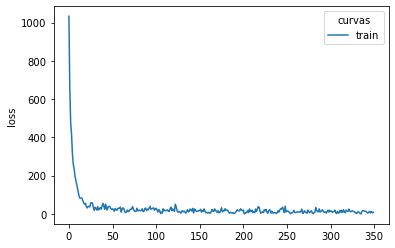

In [18]:
import matplotlib.pyplot as plt
plt.plot(listadd1, label='train')
plt.ylabel('loss')
plt.legend(title='curvas')
plt.show()

In [40]:
nlp2=spacy.load('C:/Users/Ryu/Desktop/Relatos/models40')
scorer=nlp2.evaluate(validate)
print('Con  models40')
print(scorer.ents_f)
print(scorer.ents_p)
print(scorer.ents_r)

Con  models40
91.94805194805194
92.1875
91.70984455958549


In [71]:
scorer=nlp2.evaluate(test)
print('Resultados ')
print(scorer.ents_f)
print(scorer.ents_p)
print(scorer.ents_r)

Resultados 
88.51963746223565
87.98798798798799
89.05775075987842


In [70]:
scorer=nlp2.evaluate(train)
print('Resultados ')
print(scorer.ents_f)
print(scorer.ents_p)
print(scorer.ents_r)

Resultados 
91.75565997436993
91.01694915254237
92.50645994832041


In [15]:
nlp=spacy.load('es_core_news_md')
#scorer=nlp.evaluate(validate1)

In [32]:
scorer=nlp.evaluate(validate)
print('Con es_core_news_md')
print(scorer.ents_f)
print(scorer.ents_p)
print(scorer.ents_r)

Con es_core_news_md
77.4025974025974
77.60416666666666
77.2020725388601


In [84]:
minibatch(train, size=compounding(4.0, 32.0, 1.001))

In [33]:
ner = nlp
lossev=[]

for i in tqdm(range(0,350)):
    losses1 = {}
    batches = minibatch(validate, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts2, annotations2 = zip(*batch)
        ner.update(texts2, annotations2, sgd=None, losses=losses1) 
    lossev.append(losses1)

100%|██████████████████████████████████████████████████████████████████████████████| 350/350 [1:06:05<00:00, 11.33s/it]


In [45]:
validate

[{'parser': 0.0, 'tagger': 68.30223774909973, 'ner': 153.86315541311816},
 {'tagger': 10.566656752489507, 'ner': 91.7696313776018, 'parser': 0.0},
 {'ner': 50.45754225255593, 'parser': 0.0, 'tagger': 1.9918444557406474},
 {'parser': 0.0, 'tagger': 0.5599977098127056, 'ner': 21.923851887578373},
 {'ner': 8.230570951846065, 'parser': 0.0, 'tagger': 0.008701704544591848},
 {'parser': 0.0, 'ner': 0.03556940421340657, 'tagger': 0.0003555115464450864},
 {'ner': 6.456120043852066e-06,
  'tagger': 6.501205993458825e-05,
  'parser': 0.0},
 {'parser': 0.0,
  'ner': 7.750901318270064e-07,
  'tagger': 3.297249942590952e-05},
 {'parser': 0.0,
  'tagger': 2.0871887812745626e-05,
  'ner': 2.6733785697840184e-07},
 {'ner': 1.5502112607927464e-07,
  'tagger': 1.4574826728619428e-05,
  'parser': 0.0},
 {'ner': 1.0582346733145783e-07,
  'tagger': 1.0757212706380415e-05,
  'parser': 0.0},
 {'tagger': 8.22774592990072e-06, 'parser': 0.0, 'ner': 7.822864203071513e-08},
 {'ner': 6.0749307404427e-08, 'tagger'

In [44]:
listadd=[]
for i in lossev:
    listadd.append(i.get('ner'))

In [40]:
lossev


[{'tagger': 0.0, 'ner': 131.71167078176052, 'parser': 0.0},
 {'ner': 47.188181929631526, 'parser': 0.0, 'tagger': 0.0},
 {'ner': 29.489357367558476, 'tagger': 0.0, 'parser': 0.0},
 {'ner': 7.001371911088519, 'tagger': 0.0, 'parser': 0.0},
 {'ner': 1.9629276130638353, 'tagger': 0.0, 'parser': 0.0},
 {'tagger': 0.0, 'parser': 0.0, 'ner': 1.200101626048637},
 {'ner': 0.009165892572906875, 'parser': 0.0, 'tagger': 0.0},
 {'parser': 0.0, 'ner': 2.1356768513225965e-05, 'tagger': 0.0},
 {'parser': 0.0, 'tagger': 0.0, 'ner': 9.324653289972843e-06},
 {'ner': 4.007991385436673e-06, 'tagger': 0.0, 'parser': 0.0},
 {'parser': 0.0, 'ner': 2.6365672562633897e-06, 'tagger': 0.0},
 {'tagger': 0.0, 'parser': 0.0, 'ner': 1.9914122562512974e-06},
 {'tagger': 0.0, 'ner': 1.593770832307562e-06, 'parser': 0.0},
 {'tagger': 0.0, 'ner': 1.3178154799514764e-06, 'parser': 0.0},
 {'tagger': 0.0, 'parser': 0.0, 'ner': 1.114215718690148e-06},
 {'tagger': 0.0, 'ner': 9.580473864013112e-07, 'parser': 0.0},
 {'tagger

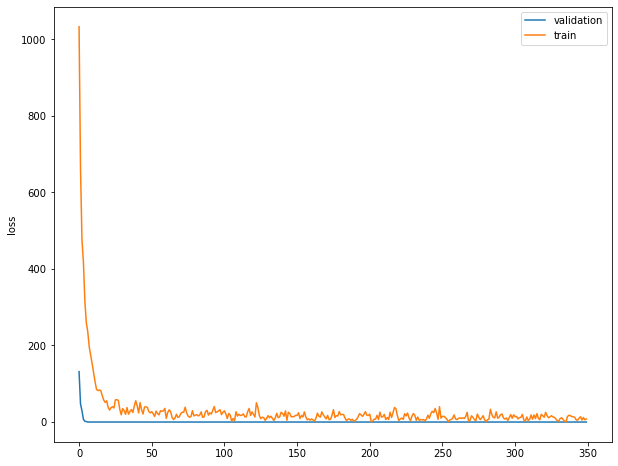

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.plot(listadd, label='validation')
plt.plot(listadd1, label='train')

plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
df5=pd.DataFrame(listadd)

In [61]:
df5.to_excel('losse1.xlsx',index=False)

In [49]:
listadd1=df5[0].tolist()

In [50]:
listadd1

[1032.756487298296,
 661.8917809323572,
 475.901824581522,
 417.9281553671634,
 314.8700748613073,
 259.4830684607459,
 235.5242191677561,
 196.3349397443521,
 175.1444086534905,
 152.3258575272378,
 129.1424838370112,
 105.5236110375407,
 85.50045147339193,
 82.04951896403091,
 83.85438583410469,
 81.74387535868105,
 68.35449636291904,
 57.24936807911382,
 51.21046975908789,
 55.51056647959533,
 38.6323313083081,
 31.23578375311061,
 37.68177444836316,
 40.0114456103538,
 36.68255410657762,
 58.03170363622455,
 58.18117265143502,
 56.6451593485975,
 33.60807043462233,
 18.86417079987957,
 35.01332937206011,
 29.95765707515165,
 20.18388244724966,
 37.87145633647923,
 20.60557964733184,
 27.48065473293535,
 32.65347146418932,
 24.87730083902762,
 41.63337679156989,
 55.56109831362821,
 41.84725500457835,
 23.73304157711205,
 50.68636110261742,
 32.19364262878307,
 20.88603599397102,
 38.99360134104425,
 39.75460138772795,
 38.36616869320333,
 27.32930357053306,
 23.94000102731844,
 27.